In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from scipy.spatial import distance
# from scipy.sparse.csgraph import minimum_spanning_tree
import math
import pickle
import time


## USING PREVIOUS DATA

We want to be able to save thing 

IF Pickled = True then we will previously simulated data using the pickle packge

In [2]:
PICKLED = False 

### Simulation stage

In [3]:
from modules.multi_bounds import bounds_class


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
mean_sep = np.linspace(0, 3, 15 , endpoint = True)

mean_sep = np.insert(mean_sep, 1, .1)
# mean_sep = np.linspace(.05, 3, 2 , endpoint = True)

mean_sep

array([0.        , 0.21428571, 0.42857143, 0.64285714, 0.85714286,
       1.07142857, 1.28571429, 1.5       , 1.71428571, 1.92857143,
       2.14285714, 2.35714286, 2.57142857, 2.78571429, 3.        ])

In [5]:
bound_obj_lst = []

if PICKLED: ## We just skip all the data creation if we are using save data. 
    print("USING PREVIOUS DATA NOT SIMULATING DATA ")
else:

    sample_size= 400
    MC_num = 500
    n0, n1 = sample_size, sample_size

    for i in mean_sep:

        start = time.time()


        mean1 = [0, 0, 0 ]
        covariance1 = np.identity(3)

        mean2 = [i, 0, 0  ]

        covariance2= np.identity(3)

        mean1 = np.array(mean1)
        mean2 = np.array(mean2)
        params1  = [mean1, covariance1, n0]
        params2  = [mean2, covariance2, n1]
        
        tight_params = [10, 20 ]

        bounds = bounds_class("mv_normal", params1, params2, threads =2,  MC_num = MC_num, tight_params = tight_params )
        
        bound_obj_lst.append(bounds)
        
        end = time.time()
        
        print("done with ", i, " in ",  end -start )



done with  0.0  in  24.643599033355713
done with  0.21428571428571427  in  29.94369673728943
done with  0.42857142857142855  in  33.4777295589447
done with  0.6428571428571428  in  33.20233750343323
done with  0.8571428571428571  in  32.746081590652466
done with  1.0714285714285714  in  36.45573663711548
done with  1.2857142857142856  in  41.9757821559906
done with  1.5  in  29.61194086074829
done with  1.7142857142857142  in  34.606847047805786
done with  1.9285714285714284  in  37.35373640060425
done with  2.142857142857143  in  35.95125865936279
done with  2.357142857142857  in  34.081013917922974
done with  2.571428571428571  in  37.76038098335266
done with  2.7857142857142856  in  37.092289447784424
done with  3.0  in  34.65241074562073


##### Pickling
This is where the data either gets save or loaded

In [6]:
file_path = 'sim_data/means_sep_v2.pkl' # DONT FORGET TO CHANGE ME IF YOU COPY AND PASTE


if PICKLED  == False:
    
    objects_to_save = bound_obj_lst


    with open(file_path, 'wb') as file:
        # Use pickle.dump to serialize and write the list of objects to the file
        pickle.dump(objects_to_save, file)
    print(f'Objects saved to {file_path}')
    

elif PICKLED == True:
    

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load to deserialize and load the list of objects from the file
        loaded_objects = pickle.load(file)

    print('Loaded object successfully')
    
    bound_obj_lst = loaded_objects

Objects saved to sim_data/means_sep_v2.pkl


### Using the data

may or not be pickled. 

In [7]:
dp_l = []
dp_u = []

Bha_u =[]
Bha_l =[]

tight_l = []
tight_u = []

for obj in bound_obj_lst:
    a,b = obj.get_bounds_dp()
    dp_l.append(np.mean(a))
    dp_u.append(np.mean(b))
    
    a,b = obj.get_bounds_Bha()
    Bha_l.append(np.mean(a))
    Bha_u.append(np.mean(b))
    
    a, b = obj.get_bounds_tight()
    tight_l.append(np.mean(a))
    tight_u.append(np.mean(b))

    
    

In [8]:
exact = []

for i in mean_sep:
    dx = 0.001
    x = np.arange(-5, 5 + dx, dx)

    f0 = np.exp(-0.5 * (x - 0)**2) / np.sqrt(2 * np.pi)
    f1 = np.exp(-0.5 * (x - i)**2) / np.sqrt(2 * np.pi)

    fmin = np.minimum(f0, f1)

    BER = 0.5 * np.sum(fmin * dx)
    
    exact.append(BER)

#     print("BER 2d:", BER)

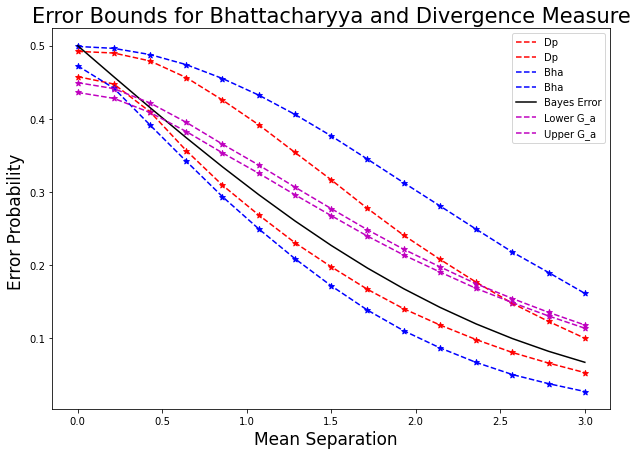

In [9]:
fs =17
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(mean_sep, dp_l, 'r--', label='Dp')
ax.plot(mean_sep, dp_u, 'r--', label='Dp')

ax.scatter(mean_sep, dp_l, color='r', marker='*')
ax.scatter(mean_sep, dp_u, color ='r', marker ='*' )

ax.plot(mean_sep, Bha_l, 'b--', label='Bha')
ax.plot(mean_sep, Bha_u, 'b--', label='Bha')
ax.scatter(mean_sep, Bha_u, color='b', marker='*')
ax.scatter(mean_sep, Bha_l, color ='b', marker ='*' )


ax.plot(mean_sep, exact, 'k', label='Bayes Error')

ax.plot(mean_sep, tight_l, 'm--', label='Lower G_a')
ax.plot(mean_sep, tight_u, 'm--', label='Upper G_a')
ax.scatter(mean_sep, tight_l, color='m', marker='*')
ax.scatter(mean_sep, tight_u, color ='m', marker ='*' )





ax.set_xlabel("Mean Separation  ", fontsize = fs)
ax.set_ylabel("Error Probability ", fontsize=fs)
ax.set_title("Error Bounds", fontsize = fs +4)
ax.legend()
# plt.savefig("bounds.png",facecolor=(1,1,1,1))

plt.show()
